In [2]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .getOrCreate()


In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline

from pyspark.sql.functions import concat, col, lit, to_date

In [4]:
def castColumn(df, field, cast_type):
    return df \
        .withColumn(field + '_tmp', df[field].cast(cast_type)) \
        .drop(field) \
        .withColumnRenamed(field + '_tmp', field) 

In [5]:
def process_df(df):
    df = df \
        .filter(df.ArrDelay != "NA") \
        .filter(df.DepTime != "NA") \
        .filter(df.CRSDepTime != "NA") \
        .filter(df.CRSArrTime != "NA") \
        .withColumn('Date', to_date(concat(col("Year"), lit("-"), col("Month"), lit('-'), col('DayofMonth'))))
    df = castColumn(df, 'ArrDelay', 'int')
    df = castColumn(df, 'DepDelay', 'int')
    df = castColumn(df, 'CRSElapsedTime', 'int')
    df = castColumn(df, 'Distance', 'int')
    df = castColumn(df, 'TaxiOut', 'int')
    return df

In [6]:
df_big = spark.read.csv("data/2007.csv",header=True)

In [39]:
df_big.show()

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|2007|    1|         1|        1|   1232|      1225|   1341|      1340|           WN|     2891

In [8]:

df_big = process_df(df_big)


df_big.createOrReplaceTempView("df_big")

df_big.describe().toPandas().transpose()

C:\Users\user\Desktop\kto_ma_szkole_ten_ma_lzej\Erasm\BigData\spark-flights\venv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


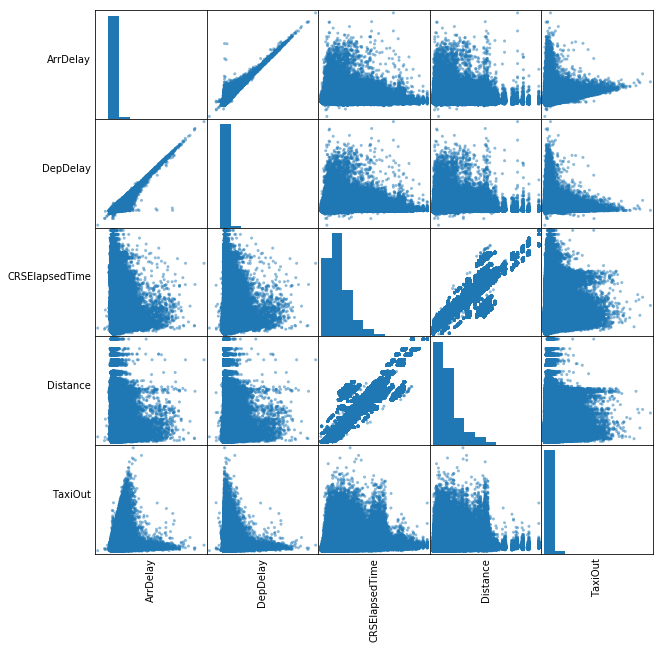

In [43]:
numeric_features = [t[0] for t in df_big.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = df_big.select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [7]:
df_big.corr('DepDelay', 'ArrDelay')

IllegalArgumentException: 'requirement failed: Currently correlation calculation for columns with dataType string not supported.'

In [50]:
plt.savefig(r"figure_1.png")

<Figure size 432x288 with 0 Axes>

In [88]:
df_big.corr('CRSElapsedTime', 'ArrDelay')

0.0054417055786659735

In [87]:
df_big.corr('Distance', 'ArrDelay')

-0.0017171179099961672

In [89]:
df_big.corr('TaxiOut', 'ArrDelay')

0.3263614338001894

In [ ]:
df_small_pd['Month_cat'] = df_small_pd['Month'].astype('category')

In [19]:
box_data = spark.sql('select DayOfWeek, ArrDelay from df_big').toPandas()


In [38]:
box_data["ArrDelay_log"]= np.log(box_data["ArrDelay"])


C:\Users\user\Desktop\kto_ma_szkole_ten_ma_lzej\Erasm\BigData\spark-flights\venv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\user\Desktop\kto_ma_szkole_ten_ma_lzej\Erasm\BigData\spark-flights\venv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


0     0.000000
1     2.079442
2     3.526361
3     3.258097
4          NaN
5     1.098612
6     3.850148
7          NaN
8     3.784190
9          NaN
10         NaN
11    3.951244
12    3.806662
13         NaN
14         NaN
15    3.496508
16         NaN
17         NaN
18         NaN
19    3.583519
Name: ArrDelay_log, dtype: float64

In [70]:

box_data["ArrDelay_trans"] = np.log(box_data["ArrDelay"]+1+
                                    np.absolute(np.min(box_data["ArrDelay"])))

In [71]:
box_data["ArrDelay_trans"]

0          5.749393
1          5.771441
2          5.849325
3          5.826000
4          5.736572
5          5.755742
6          5.886104
7          5.739793
8          5.877736
9          5.723585
10         5.710427
11         5.899897
12         5.880533
13         5.690359
14         5.730100
15         5.846439
16         5.717028
17         5.723585
18         5.710427
19         5.855072
20         5.940171
21         5.826000
22         5.726848
23         5.700444
24         5.717028
25         5.808142
26         5.789960
27         5.793014
28         5.739793
29         5.758902
             ...   
7275258    5.823046
7275259    5.720312
7275260    5.726848
7275261    5.783825
7275262    5.802118
7275263    5.780744
7275264    6.186209
7275265    5.768321
7275266    5.855072
7275267    5.934894
7275268    5.752573
7275269    5.723585
7275270    5.808142
7275271    5.846439
7275272    5.866468
7275273    5.768321
7275274    5.888878
7275275    5.869297
7275276    5.749393


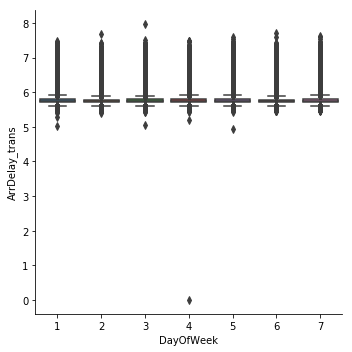

In [69]:
sns.catplot(x="DayOfWeek", y="ArrDelay_trans", kind="box", data=box_data)


In [76]:
const_shift = np.absolute(np.min(box_data["ArrDelay"]))+1
box_data["ArrDelay_boxcox"], _=stats.boxcox(box_data["ArrDelay"]+ const_shift)
box_data["ArrDelay_boxcox"].head(20)

0     1.720418
1     1.721306
2     1.724355
3     1.723455
4     1.719897
5     1.720675
6     1.725749
7     1.720028
8     1.725434
9     1.719366
10    1.718823
11    1.726265
12    1.725540
13    1.717988
14    1.719633
15    1.724244
16    1.719096
17    1.719366
18    1.718823
19    1.724574
Name: ArrDelay_boxcox, dtype: float64

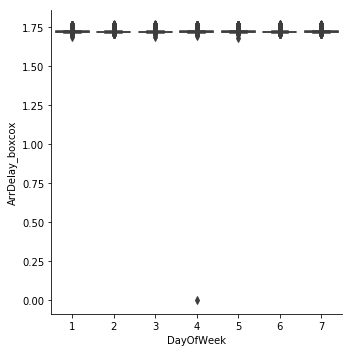

In [78]:
sns.catplot(x="DayOfWeek", y="ArrDelay_boxcox",  kind="box", data=box_data)